![logo2.jpg](https://i.postimg.cc/mgZ1D174/logo.png)

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## Importación de librerias y seteo de consola

In [97]:
# Librerías para la importación de archivos
import pandas as pd
import numpy as np
import requests

#Librería para balanseo de data set 
from imblearn.over_sampling import RandomOverSampler

# Librerías para gráficos
import seaborn as sns
from seaborn import distplot
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import scikitplot as skplt # Graficas de profundidad de tree y random forest

%matplotlib inline
sns.set()

# Librerías para el modelo
from sklearn.model_selection import train_test_split # Separa entre test y train
from sklearn.tree import DecisionTreeClassifier # Modelo Arbol de clasificacion
from sklearn.linear_model import LogisticRegression # Clase LogisticRegresion de scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Librerías para evaluar modelo

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve # función curva ROC
from sklearn.metrics import roc_auc_score # función AUC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import multiprocessing
from sklearn.metrics import mean_squared_error

In [98]:
#Seteamos para que no utilice notacion cientifica
pd.options.display.float_format = '{:.9f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
# Para que se visualice toda la pantalla y ver todas las columnas del df.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Multiples outputs en una misma línea
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## Importación dataset 

In [99]:
df_inicial = pd.read_csv(r"BankChurners.csv",
                         sep = ',' )

In [100]:
# Funcion para ver información relevante del data set

def data_exploration(df_inicial):
    '''Creamos una funcion que nos permite ver rapidamente todos los datos importantes de un dataset'''
    print('Dimensiones:\n', df_inicial.shape)
    print('-------------------------------')
    print('Nulos:\n:', df_inicial.isnull().sum())
    print('-------------------------------')
    print('Tipos de variables:', df_inicial.info())
    print('-------------------------------')

Eiminamos las últimas 2 columnas porque, según lo indica el autor del dataset, no son de utilidad para el análisis.

In [101]:
df_inicial = df_inicial.drop(columns =['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# Visualización Inicial

df_inicial.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000000000,777,11914.000000000,1.335000000,1144,42,1.625000000,0.061000000
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000000000,864,7392.000000000,1.541000000,1291,33,3.714000000,0.105000000
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000000000,0,3418.000000000,2.594000000,1887,20,2.333000000,0.000000000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000000000,2517,796.000000000,1.405000000,1171,20,2.333000000,0.760000000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000000000,0,4716.000000000,2.175000000,816,28,2.500000000,0.000000000


In [102]:
data_exploration(df_inicial)

Dimensiones:
 (10127, 21)
-------------------------------
Nulos:
: CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 no

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 1 - Descripción base de datos 

#### Problemática y Objetivo General

Este set de datos se encuentra originalmente en el sitio https://leaps.analyttica.com/home, pero el mismo se obtuvo de https://www.kaggle.com/sakshigoyal7/credit-card-customers. 

El gerente de una de las sucursales del banco al que pertenece el departamento de data science, se ve molesto porque cada vez más clientes dejan sus servicios de tarjetas de crédito. Realmente agradecería si se pudiera predecir quién se debe acudir de manera proactiva al cliente para brindarles mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta. El conjunto de datos consta de 10.000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, entre otras variables. Solo se dispone de un 16,07% de  clientes que han abandonado el servicio, con lo cual, habrán que realizar varias transformaciones al Data Set desbalanceado.

#### Objetivos específicos:

- Identificar comportamientos y características de las personas que tienden a abandonar o no el servicio del banco.
- Generar un modelo que permita predecir si un cliente abandonará o no el servicio ofrecido.
- Proponer acciones a corto y largo plazo que permitan retener en mayor medida a los clientes que abandonan según la información obtenida.

#### Significado de las features del Data Set

##### NUMERICAS (Sorted by: A --> Z)

- Target: Variable de evento interno (actividad del cliente): si la cuenta está cerrada, entonces 1 más 0

- Avg_Open_To_Buy: Línea de crédito abierta para comprar (promedio de los últimos 12 meses)

- Avg_Ratio: Índice de utilización promedio de la tarjeta

- Age: Variable demográfica - Edad del cliente en años

- Contacts_Count_12: No. de contactos en los últimos 12 meses

- Credit_Limit: límite de crédito en la tarjeta de crédito

- Dependent_Count: Variable demográfica - Número de dependientes

- Months_Inactive_12: No. de meses inactivos en los últimos 12 meses

- Months_On_Book: Período de relación con el banco en meses.

- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 <: Naive Bayes

- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: Naive Bayes

- Total_Amt_Chng_Q4_Q1: Cambio en el monto de la transacción (Q4 sobre Q1)

- Total_Ct_Chng_Q4_Q1: Cambio en el recuento de transacciones (Q4 sobre Q1)

- Total_Relatoinship_Count: Número total de productos en poder del cliente.

- Total_Revolving_Bal: Saldo rotatorio total en la tarjeta de crédito.

- Total_Trans_Amt: Importe total de la transacción (últimos 12 meses).

- Total_Trans_Ct: Total de transacciones (últimos 12 meses).

##### CATEGORICAS (Sorted by: A --> Z)

- Card_Category: Variable de producto - Tipo de tarjeta (Blue, Silver, Gold, Platinum)

- Gender: Variable demográfica - M = Masculino, F = Femenino

- ID: Número de cliente. Identificador único del cliente titular de la cuenta

- Income_Range: Categoría de ingreso anual del titular de la cuenta (<40𝐾, 40K - 60K, 60𝐾− 80K, 80𝐾− 120K,>)

- Marital_Status: Variable demográfica - Casado, Soltero, Divorciado, Desconocido

- Education: Variable demográfica - Calificación educativa del titular de la cuenta (ejemplo: escuela secundaria, graduado universitario, etc.)

### 1.1 - Renombre de columnas

Para simplificar la escritura de las columnas, las renombraremos:

In [103]:
df = df_inicial.copy()

df.rename({"CLIENTNUM" : "ID",
          "Attrition_Flag" : "Target",
          "Customer_Age" : "Age",
          "Education_Level" : "Education",
          "Dependent_count" : "Dependent_Count",
          "Income_Category" : "Income_Range",
          "Months_on_book" : "Months_On_Book",
          "Months_Inactive_12_mon" : "Months_Inactive_12",
          "Contacts_Count_12_mon" : "Contacts_Count_12",
          "Avg_Utilization_Ratio" : "Avg_Ratio"},
          axis = 1,
          inplace = True)

df_renombre = df.copy() #Hago una copia para tener un df con el cambio de columnas, sin seteo del ID

# Seteamos como index el "ID" del Cliente
df.set_index("ID", inplace = True)

# Ordenamos index en forma ascendente
df.sort_index(ascending = True, inplace = True)

In [104]:
# Visualizamos dimensiones del DF y el cambio realizado en las columnas

df.shape
df.columns

(10127, 20)

Index(['Target', 'Age', 'Gender', 'Dependent_Count', 'Education',
       'Marital_Status', 'Income_Range', 'Card_Category', 'Months_On_Book',
       'Total_Relationship_Count', 'Months_Inactive_12', 'Contacts_Count_12',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Ratio'],
      dtype='object')

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 2 - Análisis Exploratorio de Datos

In [105]:
data_exploration(df)

Dimensiones:
 (10127, 20)
-------------------------------
Nulos:
: Target                      0
Age                         0
Gender                      0
Dependent_Count             0
Education                   0
Marital_Status              0
Income_Range                0
Card_Category               0
Months_On_Book              0
Total_Relationship_Count    0
Months_Inactive_12          0
Contacts_Count_12           0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Ratio                   0
dtype: int64
-------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 708082083 to 828343083
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Target                    10127 non-null  object 
 1

In [106]:
# Visualización de variables estadísticas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10127.000000000,46.325960304,8.016814033,26.000000000,41.000000000,46.000000000,52.000000000,73.000000000
Dependent_Count,10127.000000000,2.346203219,1.298908349,0.000000000,1.000000000,2.000000000,3.000000000,5.000000000
Months_On_Book,10127.000000000,35.928409203,7.986416331,13.000000000,31.000000000,36.000000000,40.000000000,56.000000000
Total_Relationship_Count,10127.000000000,3.812580231,1.554407865,1.000000000,3.000000000,4.000000000,5.000000000,6.000000000
Months_Inactive_12,10127.000000000,2.341167177,1.010622399,0.000000000,2.000000000,2.000000000,3.000000000,6.000000000
Contacts_Count_12,10127.000000000,2.455317468,1.106225143,0.000000000,2.000000000,2.000000000,3.000000000,6.000000000
Credit_Limit,10127.000000000,8631.953698035,9088.776650223,1438.300000000,2555.000000000,4549.000000000,11067.500000000,34516.000000000
Total_Revolving_Bal,10127.000000000,1162.814061420,814.987335236,0.000000000,359.000000000,1276.000000000,1784.000000000,2517.000000000
Avg_Open_To_Buy,10127.000000000,7469.139636615,9090.685323679,3.000000000,1324.500000000,3474.000000000,9859.000000000,34516.000000000
Total_Amt_Chng_Q4_Q1,10127.000000000,0.759940654,0.219206769,0.000000000,0.631000000,0.736000000,0.859000000,3.397000000


In [107]:
# Visualizamos variable categóricas
df.describe(exclude = ['float', 'int64'])

,Target,Gender,Education,Marital_Status,Income_Range,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [108]:
# Vamos a crear un diccionario para reemplazar Los valores del Target
mapping_dict = {'Existing Customer':0,
                'Attrited Customer':1}

# Usamos nuestro diccionario para reemplazar los valores en la columna
df['Target'] = df['Target'].replace(mapping_dict)

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 3 - Análisis Univariado

### Seleccionamos las siguientes variables para el analisis univariado

> - a) Card_Category
> - b) Age
> - c) Months_On_Book

Haremos unas transformaciones previas para generar la distribucion de frecuencia para "Card_Category":

In [109]:
frecuencia = df['Card_Category'].value_counts()
frecuencia

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [110]:
# Pasamos esta informacion a un dataframe 
df_frecuencia = pd.DataFrame(frecuencia)

# Asignamos el nombre cantidad a la columna Card_Category
df_frecuencia.rename(columns={'Card_Category':'frec_abs'},inplace=True)
df_frecuencia

,frec_abs
Blue,9436
Silver,555
Gold,116
Platinum,20


#### Frecuencias absolutas

In [111]:
frecuencia_absoluta = df_frecuencia["frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
frec_abs_acu = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in frecuencia_absoluta:
    valor_acum = valor_acum + i
    frec_abs_acu.append(valor_acum)
    
df_frecuencia["frec_abs_acum"] = frec_abs_acu
df_frecuencia

,frec_abs,frec_abs_acum
Blue,9436,9436
Silver,555,9991
Gold,116,10107
Platinum,20,10127


#### Frecuencia Relativa en %

In [112]:
df_frecuencia["frec_rel_%"] = 100 * df_frecuencia["frec_abs"]/len(df.Card_Category)
df_frecuencia

,frec_abs,frec_abs_acum,frec_rel_%
Blue,9436,9436,93.176656463
Silver,555,9991,5.480398934
Gold,116,10107,1.145452750
Platinum,20,10127,0.197491853


In [113]:
#Obtenemos los valores de las Frecuencias Relativas Acumuladas
Frec_rel_val = df_frecuencia["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
frec_rel_acu = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    frec_rel_acu.append(valor_acum)
    
df_frecuencia["frec_rel_%_acum"] = frec_rel_acu
df_frecuencia

,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Blue,9436,9436,93.176656463,93.176656463
Silver,555,9991,5.480398934,98.657055396
Gold,116,10107,1.145452750,99.802508147
Platinum,20,10127,0.197491853,100.000000000


Ahora sí podemos continuar:

### 3.1 - DISTRIBUCIÓN DE FRECUENCIAS "Card_Category"

En forma gráfica, quedaría como se indica a continuación:

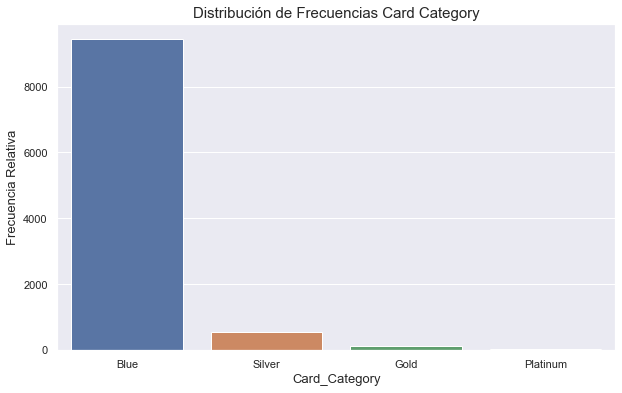

In [114]:
frec = plt.figure(figsize=(10, 6))

plot = sns.barplot(x=df.Card_Category.value_counts().index,
                   y=df.Card_Category.value_counts())

plot.set_title("Distribución de Frecuencias Card Category",
               fontdict={'fontsize': 15})
plot.set_xlabel("Card_Category",
                fontsize=13)
plot.set_ylabel("Frecuencia Relativa",
                fontsize=13);


<div class="alert alert-success" role="alert">

El 93.17% de los datos están concentrados en las tarjetas de tipo azul. Por ahora, asumimos que esta distribución se debe a los tipos de clientes, ya que las tarjetas gold y platinum suelen ser para clientes con altos niveles de ingresos.

Como complemento, analizamos la misma variable en función del target:

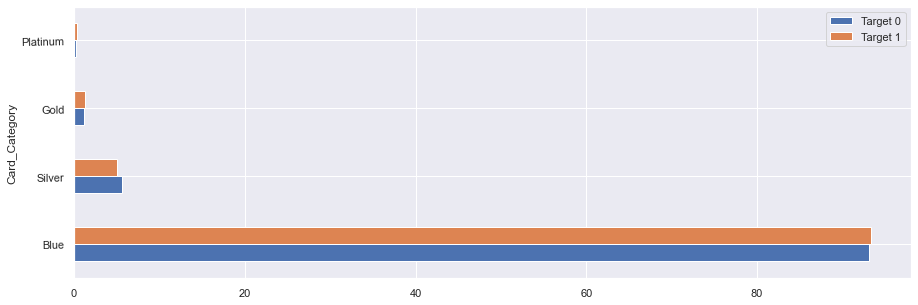

In [115]:
total_no_abandonaron = df[df.Target == 0].groupby('Card_Category').Target.count().sum()
total_si_abandonaron = df[df.Target == 1].groupby('Card_Category').Target.count().sum()

# Clientes que no abandonaron en porcentaje (%)
card_target_0 = ((df[df.Target == 0].groupby('Card_Category').Target.count().sort_values(ascending=False)) / total_no_abandonaron ) * 100

# Clientes que abandonaron en porcentaje (%)
card_target_1 = ((df[df.Target == 1].groupby('Card_Category').Target.count().sort_values(ascending=False)) / total_si_abandonaron ) * 100

df_bar = pd.DataFrame({'Target 0': card_target_0,
                       'Target 1': card_target_1})
ax = df_bar.plot.barh(rot=1,
                     figsize = (15,5))

<div class="alert alert-success" role="alert">
    
Como se observa en el grafico, el abandono de clientes es porporcional a la cantidad de personas que tienen las distintas tarjetas. Como se mencionó, el 93% de los clientes poseen tarjeta azul, por lo que se hará foco en dicho grupo para los próximos análisis.

### 3.2 - DISTRIBUCIÓN DE FRECUENCIAS "Age"

In [116]:
bins_months = round(1+3.22*np.log(df["Age"].count()))
bins_months

31

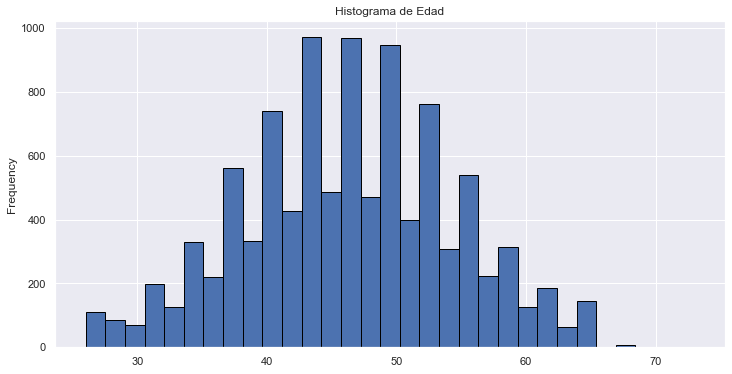

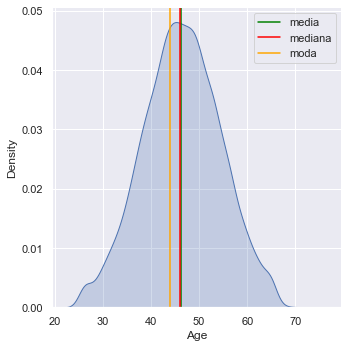

In [117]:
# Histograma común
histo = df["Age"].plot.hist(bins=31,
                            edgecolor="black",
                            figsize=(12, 6),
                            title="Histograma de Edad")
fig2 = histo.get_figure()
fig2.savefig('histo2.jpg')

# Dibujamos el grafico que queremos --> sns.displot() para graficar distribuciones
ax = sns.displot(data=df,
                 x='Age',
                 kind='kde',
                 fill=True)

# MEDIA: linea vertical color verde
plt.axvline(df['Age'].mean(),
            label='media',
            color='green')

# MEDIANA: linea vertical color roja
plt.axvline(df['Age'].median(),
            label='mediana',
            color='red')

# MODA: linea vertical color naranja
plt.axvline(float(df['Age'].mode()),
            label='moda',
            color='orange')

# Mostramos todas las etiquetas que colocamos
plt.legend()
# corregimos que el gráfico no arranca desde y=0
plt.ylim(0);

<div class="alert alert-success" role="alert">
Se visualiza que la mediana y media ronda los 45 años de edad, siendo el grupo etéreo que el banco más atrapa.

La mediana y media se ubican en el mismo sector, mientras que la moda se desplaza un poco hacia la izquierda.

### 3.3 - DISTRIBUCIÓN DE FRECUENCIAS "Months_on_book"

In [118]:
# Cálculo de número de bins de referencia para nuestro gráfico
bins_months = round(1+3.22*np.log(df["Months_On_Book"].count()))
bins_months

31

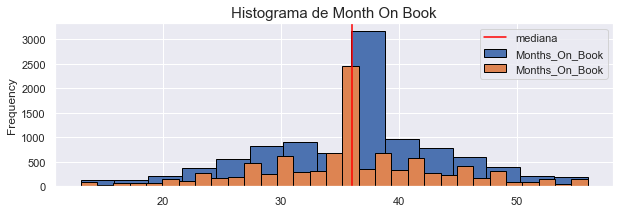

<Figure size 432x288 with 0 Axes>

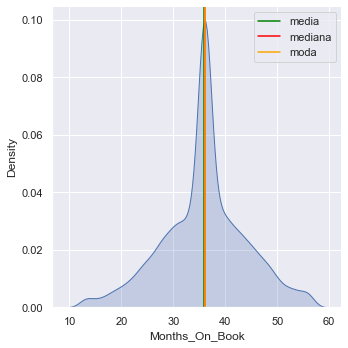

In [119]:
# Histogramas

ax = plt.axes();

df["Months_On_Book"].plot.hist(bins=15,
                               edgecolor="black",
                               ax = ax,
                               figsize=(10, 3));
df["Months_On_Book"].plot.hist(bins=31,
                               edgecolor="black",
                               figsize=(10, 3));

ax.set_title("Histograma de Month On Book",fontsize = 15);

# MEDIANA: linea vertical color roja
plt.axvline(df['Months_On_Book'].median(),
            label='mediana',
            color='red');
plt.legend();

# Dibujamos el grafico que queremos --> sns.displot() para graficar distribuciones
plt.figure();
ax = sns.displot(data=df,
                 x='Months_On_Book',
                 kind='kde',
                 fill=True);

# MEDIA: linea vertical color verde
plt.axvline(df['Months_On_Book'].mean(),
            label='media',
            color='green');

# MEDIANA: linea vertical color roja
plt.axvline(df['Months_On_Book'].median(),
            label='mediana',
            color='red');

# MODA: linea vertical color naranja
plt.axvline(float(df['Months_On_Book'].mode()),
            label='moda',
            color='orange');

# Mostramos todas las etiquetas que colocamos
plt.legend();
# corregimos que el gráfico no arranca desde y=0
plt.ylim(0);


In [120]:
# Visualización de variables estadísticas.
df['Months_On_Book'].describe() 

count   10127.000000000
mean       35.928409203
std         7.986416331
min        13.000000000
25%        31.000000000
50%        36.000000000
75%        40.000000000
max        56.000000000
Name: Months_On_Book, dtype: float64

<div class="alert alert-success" role="alert">

Se hicieron dos histogramas juntos para comparar la diferencia en el cambio de bins cual entregaba mayor detalle.
Se indica que existe una fuerte relación o meses de contrato con el banco de aproximadamente 35/36 meses, es decir, 3 años.

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 4 - Correlación entre variables

In [121]:
#Vamos a visualizar los pares de variables más correlacionadas mediante:
df.corr().unstack().sort_values().drop_duplicates()

Avg_Ratio                 Avg_Open_To_Buy       -0.538807748
                          Credit_Limit          -0.482965071
Total_Trans_Ct            Target                -0.371402701
Total_Relationship_Count  Total_Trans_Amt       -0.347228880
Total_Ct_Chng_Q4_Q1       Target                -0.290054007
                                                    ...     
Avg_Ratio                 Total_Revolving_Bal    0.624021991
Months_On_Book            Age                    0.788912359
Total_Trans_Amt           Total_Trans_Ct         0.807192035
Credit_Limit              Avg_Open_To_Buy        0.995980544
Target                    Target                 1.000000000
Length: 106, dtype: float64

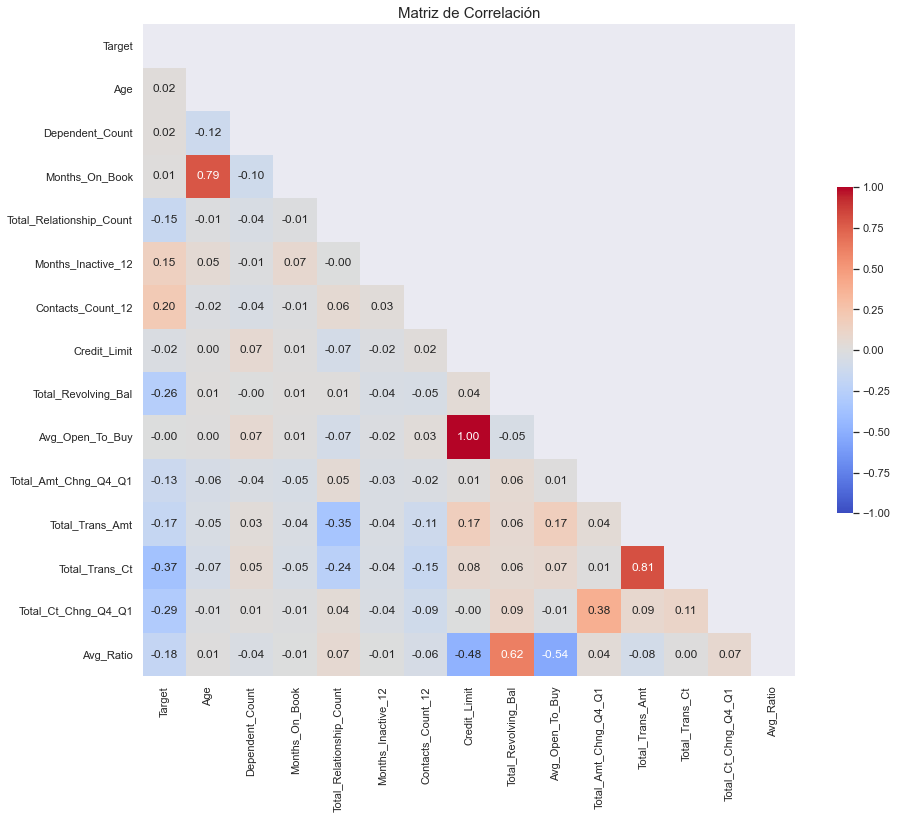

In [122]:
# Ahora veamos lo mismo de forma gráfica:
correlation = df.corr()

# Generamos una máscara para mostrar solo el triangulo inferior
mask = np.triu(correlation)
cor = plt.figure(figsize=(15,12)) # Defino el tamaño del grafico
ax = plt.axes()

#Genero el mapa de calor
sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot = True,
            fmt = '.2f',
            cmap = 'coolwarm',
            vmin =-1,
            vmax =1,
            center = 0,
            cbar_kws = {'shrink': 0.5},
            mask = mask,
            ax = ax
            )

ax.set_title("Matriz de Correlación",
             fontsize=15)
plt.show();

3 (tres) de las variables más correlacionadas y consideradas para el siguiente análisis bivariado, serán:

> - A) Months_On_Book vs. Age
> - B) Avg_Ratio vs. Total_Revolving_Bal
> - C) Total_Trans_Ct vs. Total_Trans_Amt

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 5 - Análisis Bivariado 

Antes de comenzar, convertimos la variable Target a numérica para incluír dentro del análisis bivariado:

In [123]:
# Vamos a crear un diccionario para reemplazar estos valores
mapping_dict = {'Existing Customer':0,
                'Attrited Customer':1}

#Usamos nuestro diccionario para reemplazar los valores en la columna
df['Target'] = df['Target'].replace(mapping_dict)


### 5.1 - MonthsOnBook vs. Age

Recordamos:

- MonthsOnBook (Período de relación con el banco en meses)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Age versus Month_On_Book')

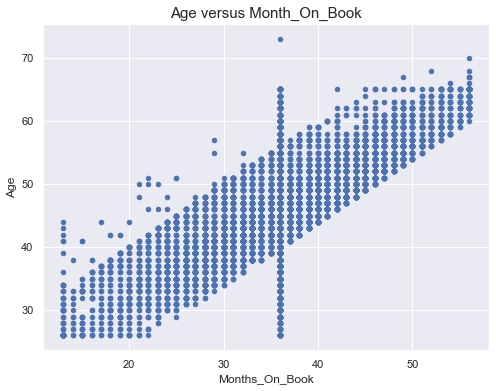

In [124]:
# Gráfica Boxplot
scat = df.plot.scatter(x='Months_On_Book',
                       y='Age',
                       figsize = (8,6))

scat.set_title("Age versus Month_On_Book",
               fontdict={'fontsize': 15})

<div class="alert alert-success" role="alert">

No se puede extraer una conclusión de este gráfico ya que el mismo parece sesgado. Este sesgo se debe a que el DataSet no expresa series temporales.

### 5.2 - Avg_Ratio vs. Total_Revolving_Bal

- Avg_Ratio (Índice de utilización promedio de la tarjeta)
- Total_Revolving_Bal (saldo rotatorio total en la tarjeta de crédito)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Avg_Ratio versus Total_Revolving_Bal')

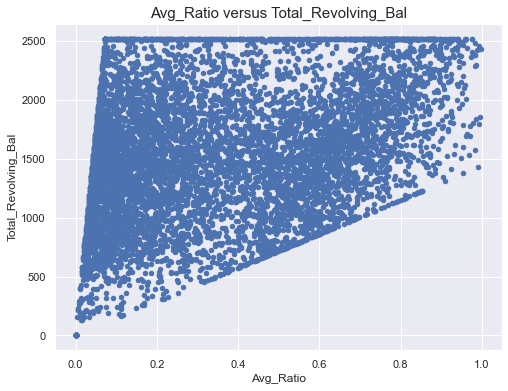

In [125]:
# Gráfica Boxplot
versus2 = df.plot.scatter(x='Avg_Ratio',
                          y='Total_Revolving_Bal',
                          figsize = (8,6));

versus2.set_title("Avg_Ratio versus Total_Revolving_Bal",
                  fontdict={'fontsize': 15})

<div class="alert alert-success" role="alert">

Al igual que la gráfica anterior, no se puede extraer una conclusión de este gráfico ya que el mismo parece sesgado. Este sesgo puede darse debido a que el DataSet no expresa series temporales.


### 5.3 - Total_Trans_Ct vs. Total_Trans_Amt

- Total_Trans_Ct: Cantidad de transacciones en los últimos 12 meses.
- Total_Trans_Amt: importe total de transacciones en los úlimos 12 meses.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


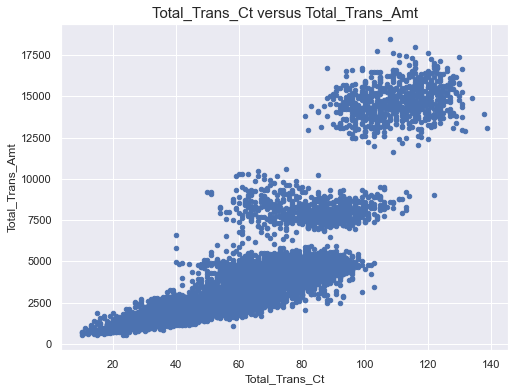

In [126]:
# Gráfica Boxplot
versus3 = df.plot.scatter(x='Total_Trans_Ct',
                          y='Total_Trans_Amt',
                          figsize=(8, 6));

versus3.set_title("Total_Trans_Ct versus Total_Trans_Amt",
                  fontdict={'fontsize': 15});


Consideremos 3 clusters:
- Cluster A: izquida inferior.
- Cluster B: zona media.
- Cluster C: derecha superior.

In [127]:
# Calculemos la densidad de puntos para cada cluster:

cluster_a = df[(df.Total_Trans_Amt <= 6250) & (df.Total_Trans_Ct < 120)].count().iloc[1]
cluster_b = df[(df.Total_Trans_Amt < 11250) & (df.Total_Trans_Amt > 6250)].count().iloc[1]
cluster_c = df[(df.Total_Trans_Amt > 11250) & (df.Total_Trans_Ct > 80)].count().iloc[1]
total_clusters = df[(df.Total_Trans_Amt > 0) & (df.Total_Trans_Ct > 0)].count().iloc[1]

print("Cantidad de puntos del Cluster A: ",
      cluster_a)
print("                                    +")
print("Cantidad de puntos del Cluster B: ",
      cluster_b)
print("                                    +")
print("Cantidad de puntos del Cluster C: ",
      cluster_c)
print("                                    =")
print("Cantidad de puntos totales:      ",
      total_clusters)

Cantidad de puntos del Cluster A:  8681
                                    +
Cantidad de puntos del Cluster B:  699
                                    +
Cantidad de puntos del Cluster C:  747
                                    =
Cantidad de puntos totales:       10127


<div class="alert alert-success" role="alert">

La mayor concentración de clientes son los del Cluster A, es decir, los que menores montos y cantidades de transacciones realizan por año!

Se considera oportuno explorar un poco más estos clusters, comparando la gráfica con otras variables.

Tomaremos el supuesto de que los clientes con tarjeta azul tienden a realizar transacciones más pequeñas. Para saberlo, realizaremos la gráfica según el Tipo de Tarjeta (Blue, Silver, Gold o Platinum): 

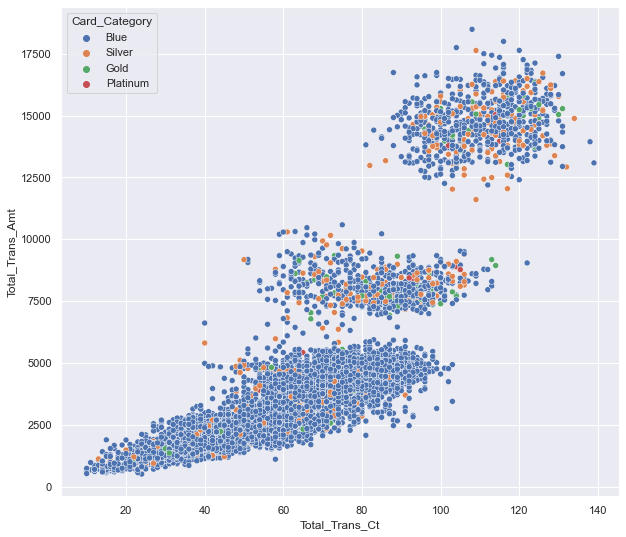

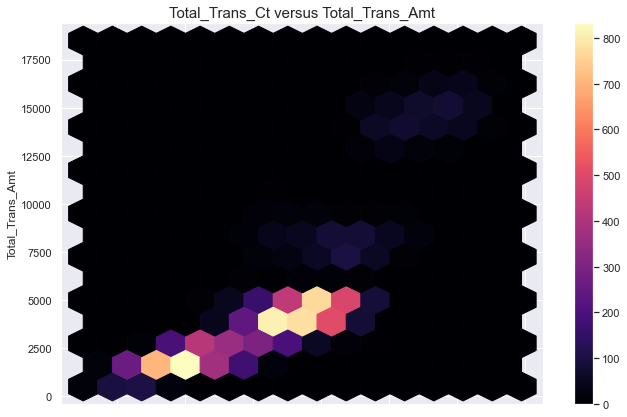

In [128]:
# Gráfica Boxplot
plt.figure(figsize=(10, 9))
sns.scatterplot(x=df['Total_Trans_Ct'],
                y=df['Total_Trans_Amt'],
                hue=df['Card_Category'])
plt.show()

# HeatMap

heatmap3 = df.plot.hexbin(x='Total_Trans_Ct',
                          y='Total_Trans_Amt',
                          gridsize=15,
                          figsize=(10.8, 7),
                          cmap="magma")

heatmap3.set_title("Total_Trans_Ct versus Total_Trans_Amt",
                   fontdict={'fontsize': 15});



<div class="alert alert-success" role="alert">

Según las dos gráficas, los clusters no dependen del tipo de tarjeta.

Probando con otras features, la columna de "Target" trajo un resultado particular:

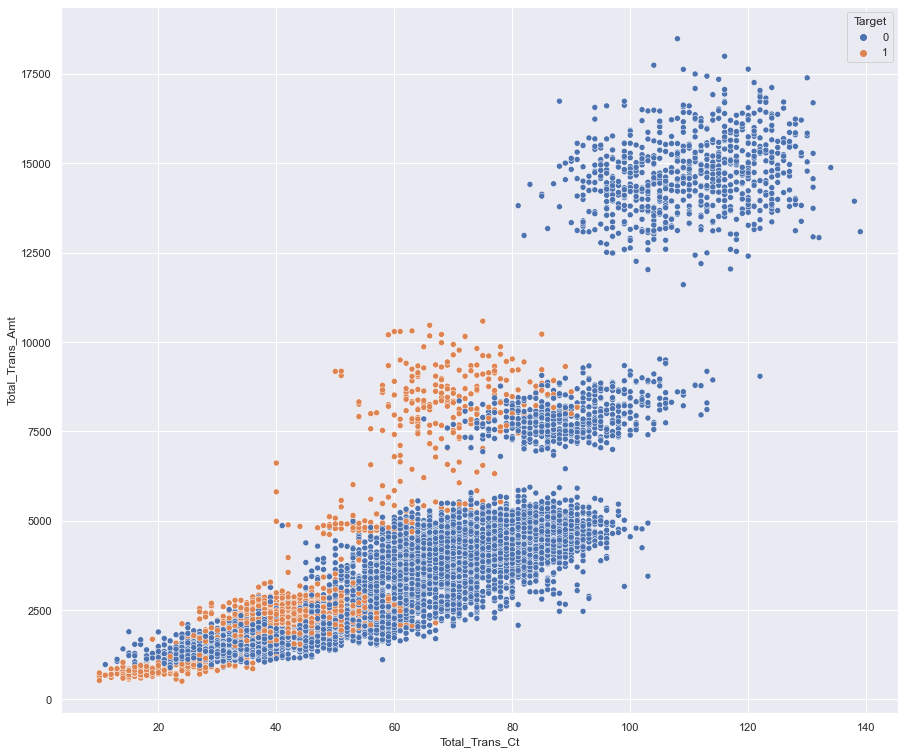

In [129]:
plt.figure(figsize = (15,13))
sns.scatterplot(x=df['Total_Trans_Ct'], y=df['Total_Trans_Amt'], hue=df['Target'])
plt.show();

<div class="alert alert-success" role="alert">
De esta gráfica se concluye que:
    
- Los clientes que abandonan el servicio tienden a realizar transacciones menores a los $ 11.000, aproximadamente (zona donde están la mayor cantidad de puntos).

- No se logró encontrar un comportamiento en otra variable que identifique cada uno de los 3 clusters.

- Existen 3 grupos marcados: Entre las 10 y 100 transacciones/año (Grupo A), entre 45 y 110 transacciones/año (Grupo B) y entre 80 y 140 transacciones/año (Grupo C). El Grupo A genera un monto total de transacciones aproximado de entre 0 y 5500 pesos, el Grupo B de entre 7000 y 10.000, mientras que el Grupo C es de entre 12500 y 17500 pesos.

Por último, queremos saber si el tipo de tarjeta es un factor importante por el cual los clientes abandonan el banco. Para ello, realizaremos los siguientes gráficos multivariados:

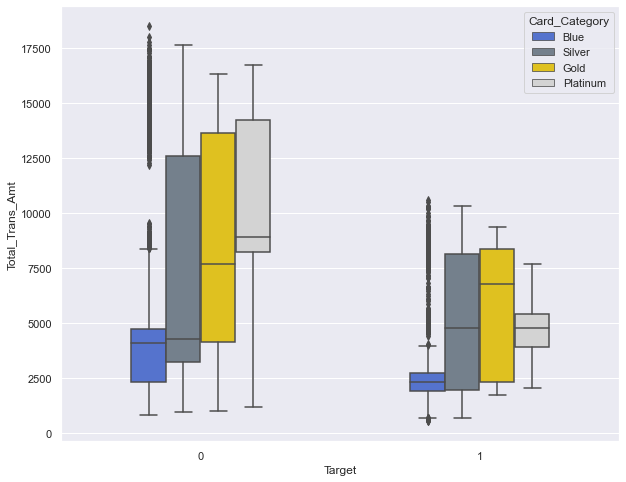

In [130]:
A1 = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")

my_pal = ["royalblue",
          "slategrey",
          "gold",
          "lightgrey"]

sns.boxplot(x="Target",
            y="Total_Trans_Amt",
            hue="Card_Category",
            data=df,
            palette= my_pal,
            width=0.5)

plt.show();

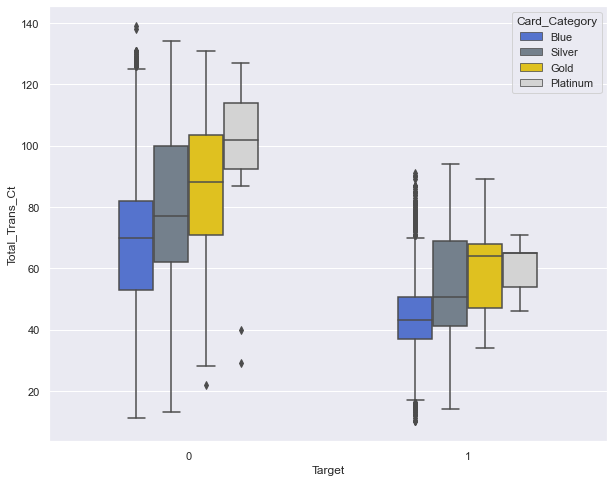

In [131]:
A2 = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")

my_pal = ["royalblue",
          "slategrey",
          "gold",
          "lightgrey"]

sns.boxplot(x="Target",
            y="Total_Trans_Ct",
            hue="Card_Category",
            data=df,
            palette= my_pal,
            width=0.5)

plt.show();

<div class="alert alert-success" role="alert">

- Los individuos que no abandonaron el banco tienden a realizar transacciones más altas (Total_Trans_Amt) y mayores cantidad de transacciones (Total_Trans_Ct) que los que abandonaron, para todas las categorías de tarjetas.
- Por otra parte, se distingue que existen individuos con tarjeta azul que gastan montos superiores (Total_Trans_Amt) a los de tarjetas de mayor categoría como lo es la Platinium. Estos clientes deberían poseer un tipo de tarjeta de mayor categoría, acción que se mencionará en las conclusiones.

Vamos a estudiar la proporción outliers para las tarjetas "Azul", tanto para los que abandonaron como para los que no:

In [132]:
blue_out_target_0 = df[(df.Target == 0) & (df.Total_Trans_Amt > 8750) & (df.Card_Category == "Blue")].count().iloc[1]
blue_in_target_0 = df[(df.Target == 0) & (df.Total_Trans_Amt <= 8750) & (df.Card_Category == "Blue")].count().iloc[1]

blue_out_target_1 = df[(df.Target == 1) & (df.Total_Trans_Amt > 3780) & (df.Card_Category == "Blue")].count().iloc[1]
blue_in_target_1 = df[(df.Target == 1) & (df.Total_Trans_Amt <= 3780) & (df.Card_Category == "Blue")].count().iloc[1]

print("Transacciones Blue FUERA de rango (outliers) y Target 0:",
      blue_out_target_0 ,
      "transacciones - " ,
      round(100 * (blue_out_target_0/(blue_out_target_0+blue_in_target_0)),2),"%")

print("Transacciones Blue DENTRO de rango (outliers) y Target 0:",
      blue_in_target_0 ,
      "transacciones - " ,
      round(100 * (blue_in_target_0/(blue_out_target_0+blue_in_target_0)),2),"%")

print("-----------------------------")

print("Transacciones Blue FUERA de rango (outliers) y Target 1:",
      blue_out_target_1 ,
      "transacciones -" , round(100 * (blue_out_target_1/(blue_out_target_1+blue_in_target_1)),2),"%")

print("Transacciones Blue DENTRO de rango (outliers) y Target 1:",
      blue_in_target_1,
      "transacciones - ",
      round(100 * (blue_in_target_1/(blue_out_target_1+blue_in_target_1)),2), "%")

Transacciones Blue FUERA de rango (outliers) y Target 0: 622 transacciones -  7.86 %
Transacciones Blue DENTRO de rango (outliers) y Target 0: 7295 transacciones -  92.14 %
-----------------------------
Transacciones Blue FUERA de rango (outliers) y Target 1: 249 transacciones - 16.39 %
Transacciones Blue DENTRO de rango (outliers) y Target 1: 1270 transacciones -  83.61 %


<div class="alert alert-success" role="alert">

Podemos apreciar que una gran proporción de clientes (7,86% para los que no abandonaron y 16,39% para los que sí abandonaron) están manejando montos superiores a lo que el banco pretende transaccionar con la categoría de tarjeta Azul.

Como información complementaria, vamos a graficar las 4 variables en una misma gráfica tridimencional para reforzar las conclusiones anteriores:

In [133]:
fig = px.scatter_3d(df,
                    'Card_Category',
                    'Total_Trans_Amt',
                    'Total_Trans_Ct',
                    color='Target')
fig.show();


![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 6 - Análisis Multivariado

Estudiaremos algunas variables en función de si abandonaron o no el servicio (Target).

> - 1) Gráficos en función del tipo de tarjeta y el Target
> - 2) Gráficos en función del estado civíl y el Target
> - 3) Gráficos en función de los Ingresos de cada persona y el Target

### 6.1 - Gráficos en función del tipo de tarjeta (Card_Category)

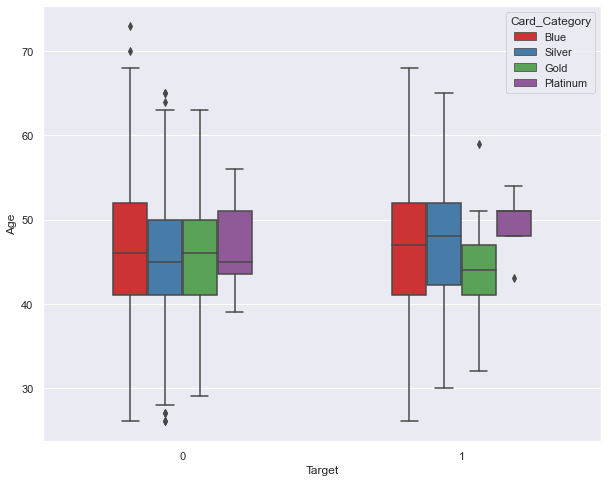

In [134]:
# Age vs. target vs. Card_Category

A3 = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x="Target",
            y="Age",
            hue="Card_Category",
            data=df,
            palette="Set1",
            width=0.5);

<div class="alert alert-success" role="alert">

La edad no parece una variable significativa para todos los tipos de tarjeta, habiendo o no abandono del servicio.


### 6.2 - Gráficos en función del estado civíl (Marital_Status) y el Target

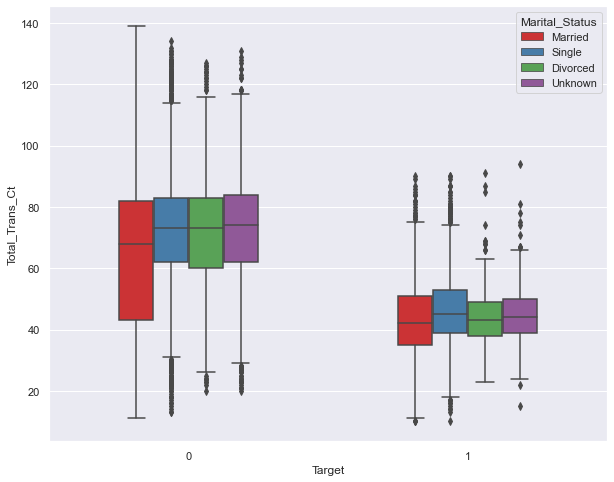

In [135]:
# BOXPLOT 1 Total_Trans_Ct vs. target vs. Marital_Status

B2 = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x="Target", y="Total_Trans_Ct", hue="Marital_Status", data=df, palette="Set1", width=0.5);

<div class="alert alert-success" role="alert">
    
La cantidad de transacciones (Total_Trans_Ct) se coporta de manera similar a los montos de transacciones (Total_Trans_Amt), ya que los que no abandonan (target 0) realizan mayor cantidad de transacciones que los que sí abandonan (target 1).

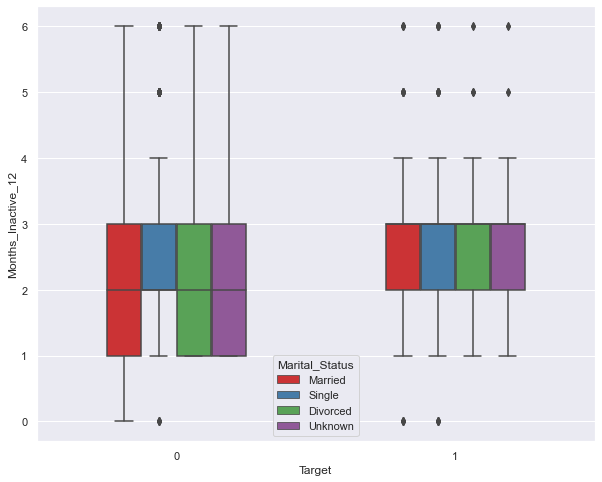

In [136]:
# BOXPLOT 2 Months_Inactive_12 vs. target vs. Marital_Status

B3 = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x="Target", y="Months_Inactive_12", hue="Marital_Status", data=df, palette="Set1", width=0.5);

<div class="alert alert-success" role="alert">

No se observa ningún comportamiento particular para las transacciones o meses de inactividad según el estado civil de la persona y el target.

### 6.3 - Gráficos en función de los Ingresos de cada persona (Income_Ranges) y el Target

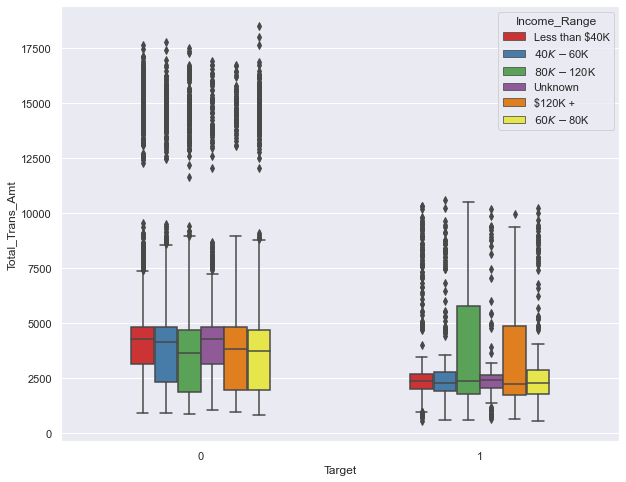

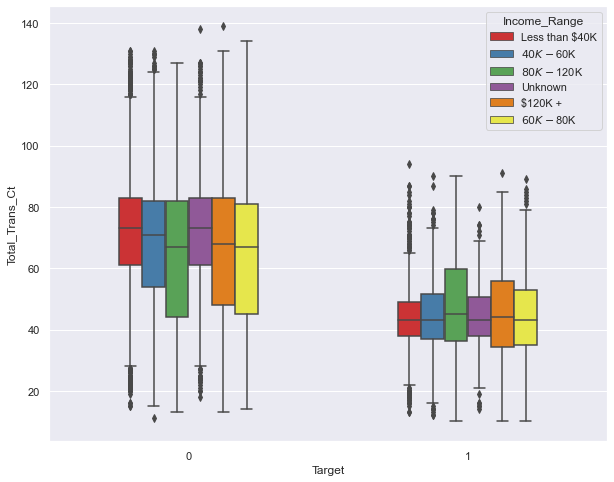

In [137]:
# BOXPLOT Total_Trans_Amt

C1 = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x="Target", y="Total_Trans_Amt", hue="Income_Range", data=df, palette="Set1", width=0.5);

# BOXPLOT Total_Trans_Ct

C2 = plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x="Target", y="Total_Trans_Ct", hue="Income_Range", data=df, palette="Set1", width=0.5);

<div class="alert alert-success" role="alert">

- Los usuarios con sueldos entre 80 y 120 K realizan mayores montos y cantidades de transacciones para su respectiva proporción de clientes.

Como complemento, vamos a analizar la composición de estos rangos de sueldos para conocer la magnitud de clientes que se están analizando en estos rangos de salarios:

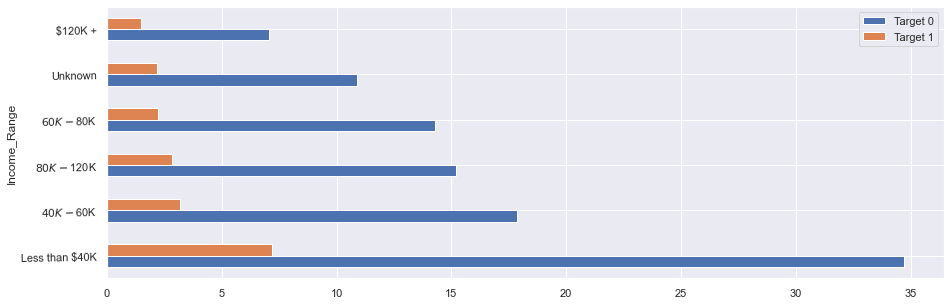

In [138]:
total_no_abandonaron_byincome = df[df.Target == 0].groupby('Income_Range').Target.count().sum()
total_si_abandonaron_byincome = df[df.Target == 1].groupby('Income_Range').Target.count().sum()

# Clientes que no abandonaron en porcentaje (%)
card_target_0 = ((df[df.Target == 0].groupby('Income_Range').Target.count().sort_values(ascending=False)) / total_no_abandonaron_byincome ) * 100
card_target_1 = ((df[df.Target == 1].groupby('Income_Range').Target.count().sort_values(ascending=False)) / total_no_abandonaron_byincome ) * 100

df_bar = pd.DataFrame({"Target 0": card_target_0,
                       "Target 1": card_target_1})
ax = df_bar.plot.barh(rot=1,
                     figsize = (15,5));

<div class="alert alert-success" role="alert">
    
- Según esta gráfica, las personas con sueldos menores a 40 k son los que predominan.

- Recopilando, existen una mayor proporción de clientes con tarjeta azul y con sueldos menores a 40 K, los cuales suelen realizar transacciones de montos igual o superiores a categorías de tarjetas más altas (gold, silver, platinium).

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 7 - Preparación del dataset para utilizar modelos

In [139]:
#Creo copia del df para poder volver un paso atras 
df_modelo = df.copy()
df_modelo['Target'].value_counts()

0    8500
1    1627
Name: Target, dtype: int64

### 7.1 - Conversión de variables categóricas a numéricas

Recordamos nuestras cinco variables categóricas:

In [140]:
df_modelo.dtypes[df.dtypes == "object"]

Gender            object
Education         object
Marital_Status    object
Income_Range      object
Card_Category     object
dtype: object


En principio, vamos a trabajar con nuestros campos Unknown ya que estos pueden afectar los modelos.
    
Luego, transformaremos con nuestras variables categóricas ordinales (Income_Range & Card_Category) utilizando la función replace, de manera de darles un orden definido.
    
Por último, utilizaremos funciones dummies para aplicarlas en nuestras variables categóricas dicotómicas (Gender) o politómicas (Education, Marital_Status).

In [141]:
# Vemos la composición de las variables
print("Income_Range")
df_modelo.Income_Range.value_counts()

print("Education")
df_modelo.Education.value_counts()

print("Card_Category")
df_modelo.Card_Category.value_counts()

print("Gender")
df_modelo.Gender.value_counts()

print("Marital_Status")
df_modelo.Marital_Status.value_counts()

Income_Range


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Range, dtype: int64

Education


Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education, dtype: int64

Card_Category


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

Gender


F    5358
M    4769
Name: Gender, dtype: int64

Marital_Status


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [142]:
# Eliminamos los registros "Unknown" de Income_Range ya que pueden afectar la predicción de los modelos.

df_modelo.drop(df_modelo[df_modelo.Income_Range == "Unknown"].index,
               inplace = True)

In [143]:
# Eliminamos valore "Unknown" de Education ya que pueden afectar la predicción de los modelos.

df_modelo.drop(df_modelo[df_modelo.Education == "Unknown"].index,
               inplace = True)

In [144]:
# Agregamos los valores Unknown de Marital_Status dentro de los más frecuentes: "Married"

dic = {"Unknown" : "Married"}

df_modelo.Marital_Status = df_modelo.Marital_Status.replace(dic)

In [145]:
# Transformamos de manera ordinal
# Vamos a crear un diccionario para reemplazar los valores del Income_Range
IncomeRange_dict = {'Less than $40K':0,
                    '$40K - $60K':1,
                    '$60K - $80K':2,
                    '$80K - $120K':3,
                    '$120K +':4}

# Usamos nuestro diccionario para reemplazar los valores en la columna
df_modelo['Income_Range'] = df_modelo['Income_Range'].replace(IncomeRange_dict)

In [146]:
# Vamos a crear un diccionario para reemplazar los valores del Card Category
CardCategory_dict = {'Blue':0,
                     'Silver':1,
                     'Gold':2,
                     'Platinum':3}

# Usamos nuestro diccionario para reemplazar los valores en la columna
df_modelo['Card_Category'] = df_modelo['Card_Category'].replace(CardCategory_dict)

In [147]:
# Convertimos el resto de las variables utilizando get_dammies
df_modelo = pd.get_dummies(df_modelo)

In [148]:
# Vemos como quedo el data set
df_modelo

,Target,Age,Dependent_Count,Income_Range,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive_12,Contacts_Count_12,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Ratio,Gender_F,Gender_M,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
708082083,0,45,3,0,0,36,4,3,3,3544.000000000,1661,1883.000000000,0.831000000,15149,111,0.734000000,0.469000000,1,0,0,0,0,1,0,0,0,1,0
708084558,1,46,3,3,0,38,6,3,3,8258.000000000,1771,6487.000000000,0.000000000,1447,23,0.000000000,0.214000000,0,1,0,1,0,0,0,0,1,0,0
708085458,0,34,2,0,0,24,6,2,2,1438.300000000,0,1438.300000000,0.827000000,3940,82,0.952000000,0.000000000,1,0,0,0,0,0,0,1,0,0,1
708098133,0,32,0,0,0,19,6,1,0,2834.000000000,1418,1416.000000000,1.458000000,1598,39,0.773000000,0.500000000,1,0,0,0,1,0,0,0,0,1,0
708099183,0,37,2,0,0,36,4,2,2,5723.000000000,1873,3850.000000000,0.851000000,2732,63,0.853000000,0.327000000,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828288333,0,50,0,2,0,46,4,1,3,3640.000000000,659,2981.000000000,0.938000000,3756,70,0.842000000,0.181000000,0,1,0,0,0,0,0,1,0,1,0
828291858,1,38,3,2,0,34,6,3,4,12050.000000000,1821,10229.000000000,0.630000000,2381,40,0.481000000,0.151000000,0,1,1,0,0,0,0,0,0,0,1
828294933,1,49,3,0,0,45,3,2,3,2951.000000000,2437,514.000000000,0.765000000,2519,36,0.565000000,0.826000000,1,0,0,0,0,1,0,0,0,1,0


In [149]:
df_modelo['Target'].value_counts()

0    6430
1    1211
Name: Target, dtype: int64

<div class="alert alert-success" role="alert">
¡Nuestro dataset está listo para introducir en nuestros modelos!

### 7.2 - Balanceo del Data Set

Vemos que la variable Target no está balanceada:

	Cantidad de No Churn/Churn:
0    6430
1    1211
Name: Target, dtype: int64

  % de No Churn/Churn:
0   84.150000000
1   15.850000000
Name: Target, dtype: float64




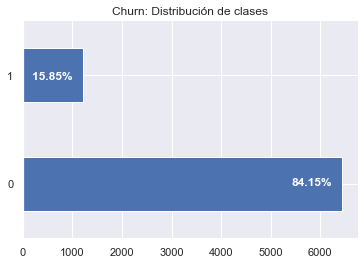

In [150]:
freq = df_modelo.Target.value_counts()
print(f"\tCantidad de No Churn/Churn:\n{freq}\n\n  % de No Churn/Churn:\n{round(freq/len(df_modelo)*100, 2)}\n\n")

ax = freq.plot.barh()
for x, y, c, l in zip(freq.values-200,
                      [0.01, 0.99],
                      np.array(freq/len(df_modelo)*100),
                      ["top", 'right']):
    
    ax.text(x,
            y,
            str(round(c, 2)) + '%',
            ha='right',
            va='center',
            color='w',
            weight='bold')
    
    ax.spines[l].set_visible(False)
    
plt.title('Churn: Distribución de clases')
plt.show();

Aplicaremos Over-Sampling en primera instancia para balancear el DataSet.

Luego de correr los modelos y evaluarlos, realizaremos una iteración más utilizando Under-Sampling para nuestro mejor modelo.

In [151]:
X_modelo = df_modelo.drop(columns = "Target")
y_modelo = df_modelo.Target

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_modelo,y_modelo)

In [152]:
# Antes del oversampling tenemos las filas y columnas originales
print("Tamaño de nuestro data set X original: ", X_modelo.shape)
print("Tamaño de nuestro data set y original: ", y_modelo.shape)

Tamaño de nuestro data set X original:  (7641, 27)
Tamaño de nuestro data set y original:  (7641,)


In [153]:
# Luego del oversampling se agregaron 6430 - 1211 = 5210 registros en el target minoritario.
print("Tamaño de nuestro data set X balanceado: ", X_resampled.shape)
print("Tamaño de nuestro data set y balanceado: ", y_resampled.shape)

y_resampled.value_counts()

Tamaño de nuestro data set X balanceado:  (12860, 27)
Tamaño de nuestro data set y balanceado:  (12860,)


0    6430
1    6430
Name: Target, dtype: int64

In [154]:
# Juntamos todo en un Data set

df_balanceado = pd.concat([X_resampled,y_resampled], axis = 1)

# Data Set final balanceado:

df_balanceado

,Age,Dependent_Count,Income_Range,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive_12,Contacts_Count_12,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Ratio,Gender_F,Gender_M,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Target
0,45,3,0,0,36,4,3,3,3544.000000000,1661,1883.000000000,0.831000000,15149,111,0.734000000,0.469000000,1,0,0,0,0,1,0,0,0,1,0,0
1,46,3,3,0,38,6,3,3,8258.000000000,1771,6487.000000000,0.000000000,1447,23,0.000000000,0.214000000,0,1,0,1,0,0,0,0,1,0,0,1
2,34,2,0,0,24,6,2,2,1438.300000000,0,1438.300000000,0.827000000,3940,82,0.952000000,0.000000000,1,0,0,0,0,0,0,1,0,0,1,0
3,32,0,0,0,19,6,1,0,2834.000000000,1418,1416.000000000,1.458000000,1598,39,0.773000000,0.500000000,1,0,0,0,1,0,0,0,0,1,0,0
4,37,2,0,0,36,4,2,2,5723.000000000,1873,3850.000000000,0.851000000,2732,63,0.853000000,0.327000000,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12855,41,2,2,2,36,2,3,3,34516.000000000,687,33829.000000000,1.015000000,4822,57,0.295000000,0.020000000,0,1,0,0,1,0,0,0,0,0,1,1
12856,42,3,0,0,38,2,3,3,6967.000000000,1767,5200.000000000,0.540000000,1919,38,0.520000000,0.254000000,0,1,0,0,1,0,0,0,0,1,0,1
12857,50,2,4,0,42,1,3,2,34162.000000000,1723,32439.000000000,0.429000000,7572,56,0.697000000,0.050000000,0,1,0,0,0,1,0,0,0,0,1,1
12858,46,4,0,0,37,3,2,2,1836.000000000,0,1836.000000000,0.323000000,1799,28,0.167000000,0.000000000,1,0,0,0,0,0,1,0,0,0,1,1


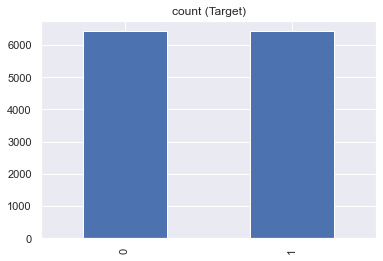

In [155]:
df_balanceado['Target'].value_counts().plot(kind='bar', title='count (Target)');

![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 8 - Ejecución de Modelos

Utilizaremos 5 modelos:
- Logistic Regression
- Random Forest
- Árboles de decisión
- KNN
- XGB_Classifier

Los pasos siguientes serán:
- Utilizar nuestros data sets df_balanceado y df_modelo (sin balancear)
- Dividir ambos datasets en train y test.
- Evaluar la profundidad para nuestros algoritmos de Desiccion Tree y Random forest en nuestro dataset balanceado (df_balanceado).
- Instanciar y fittear nuestros modelos con nuestro dataset balanceado (df_balanceado)
- Predecir utilizando los 5 algoritmos en nuestro dataset desbalanceado (df_modelo).
- Evaluar el desempeño utilizando la matriz de confusión y otras métricas de evaluación en nuestro dataset desbalanceado (df_modelo): F1, presición, Recall, curva ROC, exactitud y especificidad.
- Realizar los últimos dos pasos anteriores con Under-Sampling

### 8.1 Predicción de Modelos

In [156]:
# Entrenaremos nuestros modelos con el dataset balanceado (df_balanceado) y testearemos con nuestro dataset original post limpieza (df_modelo)

# Balanceado
X_balanceado = df_balanceado.drop('Target',
                                   axis=1)
y_balanceado = df_balanceado.Target


# Desbalanceado
X_modelo = df_modelo.drop('Target',
                           axis=1)
y_modelo = df_modelo.Target

In [157]:
# Separamos en Train y Test

# Balanceado
X_train_balan, X_test_balan, y_train_balan, y_test_balan = train_test_split(X_balanceado,
                                                                            y_balanceado,
                                                                            test_size=0.30,
                                                                            random_state=42) 
# Desbalanceado
X_train_modelo, X_test_modelo, y_train_modelo, y_test_modelo = train_test_split(X_modelo,
                                                                                y_modelo,
                                                                                test_size=0.30,
                                                                                random_state=42) 

print("Shape balanceado:",X_train_balan.shape, y_train_balan.shape, X_test_balan.shape, y_test_balan.shape)

print("Shape desbalanceado:",X_train_modelo.shape, y_train_modelo.shape, X_test_modelo.shape, y_test_modelo.shape)

Shape balanceado: (9002, 27) (9002,) (3858, 27) (3858,)
Shape desbalanceado: (5348, 27) (5348,) (2293, 27) (2293,)


##### Profundidad de modelos Decision Tree / Random Forest

Antes de predecir los modelos, vamos a evaluar qué profundidad setear a los algorítmos de Decision Tree y Random Forest en nuestro df_balanceado

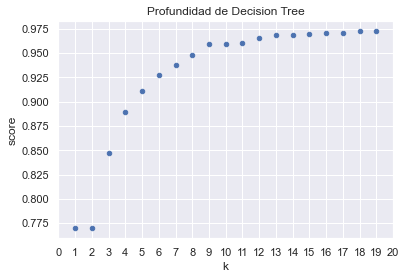

In [158]:
# Profundidad de Decision Tree

k_range = range(1, 20)
scores = []

for k in k_range:
    tree = DecisionTreeClassifier(max_depth=k, random_state = 42) # Definimos modelo
    tree.fit(X_train_balan,y_train_balan) # Instranciamos modelo
    scores.append(tree.score(X_test_balan, y_test_balan)) # Utilizamos .score
    
plt.figure()

plt.scatter(k_range,
            scores,
            alpha = 1,
            s=20)

plt.title("Profundidad de Decision Tree")
plt.xlabel('k')
plt.ylabel('score')
plt.xticks(range(0, 21));

<div class="alert alert-success" role="alert">
    
Se tomará un k = 18 como profundidad del modelo

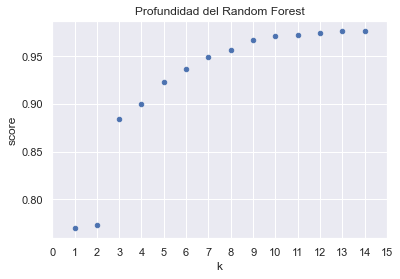

In [159]:
# Profundidad de Random Forest

k_range = range(1, 15)
scores = []

for k in k_range:
    RF= RandomForestClassifier(random_state=42,n_estimators=100, max_depth=k, max_features=None) # Definimos modelo
    RF.fit(X_train_balan, y_train_balan) # Instanciamos el modelo
    scores.append(RF.score(X_test_balan, y_test_balan)) # Utilizamos .score
    
plt.figure()

plt.scatter(k_range,
            scores,
            alpha = 1,
            s=20)

plt.title("Profundidad del Random Forest")
plt.xlabel('k')
plt.ylabel('score')
plt.xticks(range(0, 16));

<div class="alert alert-success" role="alert">
    
Se tomará un max_deph = 14 como profundidad del modelo

### 8.2 Creamos los modelos y fitteamos

Fitteamos con Train del dataset Balanceado

In [160]:
tree = DecisionTreeClassifier(max_depth = 18)
tree.fit(X_train_balan,y_train_balan)


LR = LogisticRegression()
LR.fit(X_train_balan, y_train_balan)


RF = RandomForestClassifier(max_depth=14)
RF.fit(X_train_balan,y_train_balan)


KNN = KNeighborsClassifier()
KNN.fit(X_train_balan, y_train_balan);


XGB = XGBClassifier()
XGB.fit(X_train_balan, y_train_balan)

DecisionTreeClassifier(max_depth=18)

LogisticRegression()

RandomForestClassifier(max_depth=14)

KNeighborsClassifier()

[23:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Ahora Predecimos con Train y Test del dataset desbalanceado

In [161]:
# Predicción del Decision Tree
y_pred_train_tree_modelo = tree.predict(X_train_modelo)
y_pred_test_tree_modelo = tree.predict(X_test_modelo)

# Predicción de la Regresión logistica
y_pred_train_LR_modelo = LR.predict(X_train_modelo)
y_pred_test_LR_modelo = LR.predict(X_test_modelo)

# Predicción del Random Forest
y_pred_train_RF_modelo = RF.predict(X_train_modelo)
y_pred_test_RF_modelo = RF.predict(X_test_modelo)

# Predicción de KNN
y_pred_train_KNN_modelo = KNN.predict(X_train_modelo)
y_pred_test_KNN_modelo = KNN.predict(X_test_modelo)

# Predecimos XGBClassifier
y_pred_train_XGB_modelo = XGB.predict(X_train_modelo)
y_pred_test_XGB_modelo = XGB.predict(X_test_modelo)

### 8.3 Evaluación de Modelos

Evaluamos Train y Test para el dataset desbalanceado, respecto al target verdadero

In [162]:
# Evaluamos modelo usando accuracy_score()

print('Evaluación del Decision Tree:')
print('Train: ', accuracy_score(y_train_modelo, y_pred_train_tree_modelo))
print('Test: ', accuracy_score(y_test_modelo, y_pred_test_tree_modelo))

print('-----------------------------------------')

print('Evaluación de la Regresión Logistica:')
print('Train: ', accuracy_score(y_train_modelo, y_pred_train_LR_modelo))
print('Test: ', accuracy_score(y_test_modelo, y_pred_test_LR_modelo))

print('-----------------------------------------')

print('Evaluación del Random Forest:')
print('Train', accuracy_score(y_train_modelo, y_pred_train_RF_modelo))
print('Test', accuracy_score(y_test_modelo, y_pred_test_RF_modelo))

print('-----------------------------------------')

print('Evaluación del KNN:')
print('Train', accuracy_score(y_train_modelo, y_pred_train_KNN_modelo))
print('Test', accuracy_score(y_test_modelo, y_pred_test_KNN_modelo))

print('-----------------------------------------')

print('Evaluación del XGBClassifier:')
print('Train', accuracy_score(y_train_modelo, y_pred_train_XGB_modelo))
print('Test', accuracy_score(y_test_modelo, y_pred_test_XGB_modelo))

Evaluación del Decision Tree:
Train:  0.987658937920718
Test:  0.9799389446140427
-----------------------------------------
Evaluación de la Regresión Logistica:
Train:  0.7930067314884068
Test:  0.7919755778456171
-----------------------------------------
Evaluación del Random Forest:
Train 0.9910246821241586
Test 0.9912778020061055
-----------------------------------------
Evaluación del KNN:
Train 0.8773373223635004
Test 0.8835586567815089
-----------------------------------------
Evaluación del XGBClassifier:
Train 0.9921465968586387
Test 0.9947666812036633


<div class="alert alert-success" role="alert">
    
Se ve que el modelo no está haciendo overfitting porque los valores dan similares para train y test.
    
El modelo de XGB arroja la mayor precisión de un 99% para test.

Analizando las métricas de Precision, Recall y F1 Score para los 4 modelos obtenemos en el dataset desbalanceado:

In [163]:
print("DESICION TREE:\n")
print(metrics.classification_report(y_test_modelo, y_pred_test_tree_modelo))

# -------------------------------

print("LOGISTIC REGRESION:\n")
print(metrics.classification_report(y_test_modelo, y_pred_test_LR_modelo))

# -------------------------------

print("KNN:\n")
print(metrics.classification_report(y_test_modelo, y_pred_test_KNN_modelo))

# -------------------------------

print("RANDOM FOREST:\n")
print(metrics.classification_report(y_test_modelo, y_pred_test_RF_modelo))

# -------------------------------

print("XGB CLASSIFIER:\n")
print(metrics.classification_report(y_test_modelo, y_pred_test_XGB_modelo))

DESICION TREE:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1910
           1       0.89      1.00      0.94       383

    accuracy                           0.98      2293
   macro avg       0.95      0.99      0.97      2293
weighted avg       0.98      0.98      0.98      2293

LOGISTIC REGRESION:

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1910
           1       0.43      0.77      0.55       383

    accuracy                           0.79      2293
   macro avg       0.69      0.78      0.71      2293
weighted avg       0.86      0.79      0.81      2293

KNN:

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1910
           1       0.59      0.97      0.73       383

    accuracy                           0.88      2293
   macro avg       0.79      0.92      0.83      2293
weighted avg       0.93      0.

<div class="alert alert-success" role="alert">
Se obtiene superioridad de resultados en XGB respecto al resto.

Por último, analizamos el error cuadrático medio para todos los modelos:

In [164]:
# Error de test del DESICION TREE

modelo1 = tree
predicciones1 = y_pred_test_tree_modelo
rmse1 = mean_squared_error(
        y_true  = y_test_modelo,
        y_pred  = predicciones1,
        squared = False
       )

print(f"DESICION TREE = El error (rmse) de test es: {rmse1}")

# Error de test del RANDOM FOREST

modelo2 = RF
predicciones2 = y_pred_test_RF_modelo
rmse2 = mean_squared_error(
        y_true  = y_test_modelo,
        y_pred  = predicciones2,
        squared = False
       )

print(f"RANDOM FOREST = El error (rmse) de test es: {rmse2}")

# Error de test del LOGISTIC REGRESION

modelo3 = LR
predicciones3 = y_pred_test_LR_modelo
rmse3 = mean_squared_error(
        y_true  = y_test_modelo,
        y_pred  = predicciones3,
        squared = False
       )

print(f"LOGISTIC REGRESION = El error (rmse) de test es: {rmse3}")

# Error de test del KNN

modelo4 = KNN
predicciones4 = y_pred_test_KNN_modelo
rmse4 = mean_squared_error(
        y_true  = y_test_modelo,
        y_pred  = predicciones4,
        squared = False
       )

print(f"KNN = El error (rmse) de test es: {rmse4}")

# Error de test del XGB CLASSIFIER

modelo5 = XGB
predicciones5 = y_pred_test_XGB_modelo
rmse5 = mean_squared_error(
        y_true  = y_test_modelo,
        y_pred  = predicciones5,
        squared = False
       )

print(f"XGB CLASSIFIER = El error (rmse) de test es: {rmse5}")

DESICION TREE = El error (rmse) de test es: 0.14163705513020686
RANDOM FOREST = El error (rmse) de test es: 0.09339270846214098
LOGISTIC REGRESION = El error (rmse) de test es: 0.45609694381171084
KNN = El error (rmse) de test es: 0.3412350263652474
XGB CLASSIFIER = El error (rmse) de test es: 0.07234168090621532


<div class="alert alert-success" role="alert">
El RMSE es menor para XGB Classifier.

Finalmente, como todos estos estos indicadores concluyeron favorablemente para XGB Classifier, será nuestro modelo de referencia para nuestros próximos análisis.

### 8.4 Aplicación de Grid Search en nuestro mejor clasificador: XGB Classifier

Se procederá a aplicar Grid Search a nuestro modelo de XGB y compararlo con el anterior:

In [166]:
# Generamos el clasificador XGB y lo fitteamos con nuestro data set balanceado.

XGB_new_balan = XGBClassifier(n_estimators=10,
                              seed=123,
                              use_label_encoder=False)
XGB_new_balan.fit(X_train_balan, y_train_balan) # y_train_balan se mantiene porque el número de registros es el mismo.

# Definimos una lista con los hiperparámetros a evaluar:

lista_parametros_min = {'max_depth': [None, 1, 3, 5, 10, 20],
                        'subsample': [0.5, 1],
                        'gamma': [i/10.0 for i in range(0, 5)],
                        'learning_rate': [0.001, 0.01, 0.1]
                        }

# Aplico la función GridSearch() al modelo:

GSCV_new_balan = GridSearchCV(XGB_new_balan,
                              param_grid=lista_parametros_min,
                              cv=5)
GSCV_new_balan.fit(X_train_balan, y_train_balan)


[23:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

[23:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:21:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=10,
                                     n_jobs=8, num_parallel_tree=1,
                                     predictor='auto', random_state=123,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=123, subsample=1,


In [167]:
# Analizamos los mejores hiperparámetros del modelo para aplicarlos al nuevo algoritmo:

print("Mejores hiperparámetros encontrados utilizando Grid Search:")
pd.DataFrame([GSCV_new_balan.best_params_])

print("----------------------------------------")

n_arboles_incluidos_new = len(GSCV_new_balan.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos_new}")


Mejores hiperparámetros encontrados utilizando Grid Search:


,gamma,learning_rate,max_depth,subsample
0,0.000000000,0.100000000,20,1


----------------------------------------
Número de árboles incluidos en el modelo: 10


In [168]:
# Instanciamos nuestro nuevo modelo XGB con los hiperparámetros obtenidos y lo entrenamos con datos balanceados:

XGB_new_balan = XGBClassifier(gamma=0.2,
                              learning_rate=0.1,
                              max_depth=10,
                              subsample=1)

XGB_new_balan.fit(X_train_balan, y_train_balan)

[23:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
# Predecimos con datos desbalanceados

y_pred_XGB_train_new_modelo = XGB_new_balan.predict(X_train_modelo)
y_pred_XGB_test_new_modelo = XGB_new_balan.predict(X_test_modelo)

In [170]:
print('Evaluación del XGB con Grid Search:')

print('Train', accuracy_score(y_train_modelo,
                              y_pred_XGB_train_new_modelo))
print('Test', accuracy_score(y_test_modelo,
                             y_pred_XGB_test_new_modelo))

print("----------------------------------")

print('Evaluación del XGB sin Grid Search:')

print('Train', accuracy_score(y_train_modelo,
                              y_pred_train_XGB_modelo))
print('Test', accuracy_score(y_test_modelo,
                             y_pred_test_XGB_modelo))

Evaluación del XGB con Grid Search:
Train 0.9930815258040389
Test 0.9895333624073267
----------------------------------
Evaluación del XGB sin Grid Search:
Train 0.9921465968586387
Test 0.9947666812036633


In [171]:
print("XGB con Grid Search:\n")
print(metrics.classification_report(y_test_modelo,
                                    y_pred_XGB_test_new_modelo))

print("----------------------------------")

print("XGB sin Grid Search:\n")
print(metrics.classification_report(y_test_modelo,
                                    y_pred_test_XGB_modelo))


XGB con Grid Search:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1910
           1       0.94      1.00      0.97       383

    accuracy                           0.99      2293
   macro avg       0.97      0.99      0.98      2293
weighted avg       0.99      0.99      0.99      2293

----------------------------------
XGB sin Grid Search:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1910
           1       0.97      1.00      0.98       383

    accuracy                           0.99      2293
   macro avg       0.98      1.00      0.99      2293
weighted avg       0.99      0.99      0.99      2293



In [172]:
# Diferencias de RMSE

predicciones_new = y_pred_XGB_test_new_modelo

rmse_min = mean_squared_error(y_true=y_test_modelo,
                              y_pred=predicciones_new,
                              squared=False)

print(f"XGB con Grid Search = El error (rmse) de test es: {rmse_min}")
print(f"XGB sin Grid Search = El error (rmse) de test es: {rmse5}")

XGB con Grid Search = El error (rmse) de test es: 0.10230658626243647
XGB sin Grid Search = El error (rmse) de test es: 0.07234168090621532


<div class="alert alert-success" role="alert">

Luego de aplicar Grid Search a nuestro modelo XGB, se observa un peor desempeño, con lo cual es mejor nuestro anterior modelo de XGB. Se podrían haber obtenido mejores resultados aumentando la cantidad y amplitud de hiperparámetros, pero esto no se realizó para no elevar el costo computacional.

### 8.5 - Evaluación del peso de cada variable según XGB

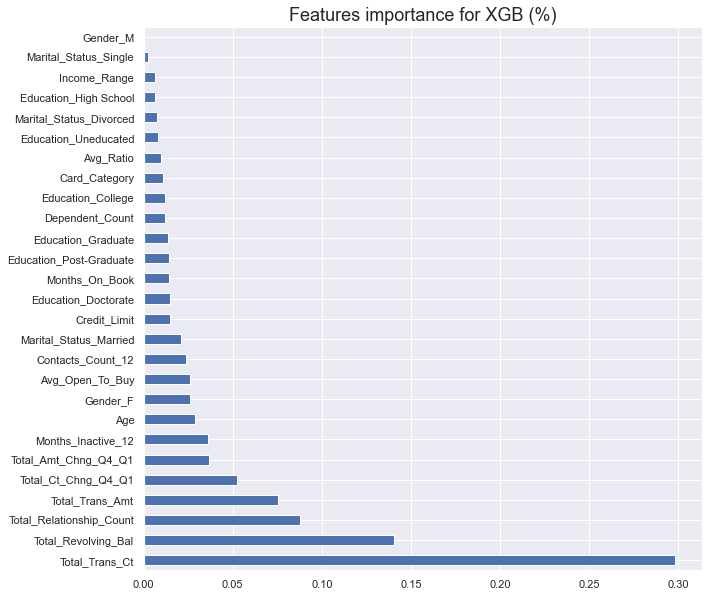

In [173]:
# Importancia de variables para XGB, menor a mayor.

plt.figure(figsize=(10,10)) 
plt.title("Features importance for XGB (%)", fontdict = {'fontsize' : 18})

(pd.Series(XGB.feature_importances_, index = X_train_balan.columns)
          .nlargest(30)
          .plot(kind='barh'));

### 8.5 Eliminado de columnas innecesarias para XGB

Se procederá a reducir el DataSet de 27 a 12 columnas, según el orden de importancia anterior del modelo de XGB. De esta manera, obtendremos un modelo con menor cantidad de features a fin de alivianar el procesamiento del algoritmo, siempre verificando que se obtenga una performance similar a la anterior. Estas variables serán:

- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Relationship_Count
- Total_Ct_Chng_Q4_Q1
- Total_Trans_Amt
- Months_Inactive_12
- Age
- Avg_Ratio
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Contacts_Count_12
- Education_Doctorate
- Education_Graduate
- Months_On_Book

In [174]:
# Generamos X_train_min y X_test_min con las columnas deseadas.

best_columns = ["Total_Trans_Ct",
                "Total_Revolving_Bal",
                "Total_Relationship_Count",
                "Total_Ct_Chng_Q4_Q1",
                "Total_Trans_Amt",
                "Months_Inactive_12",
                "Age",
                "Avg_Ratio",
                "Avg_Open_To_Buy",
                "Total_Amt_Chng_Q4_Q1",
                "Contacts_Count_12",
                "Education_Doctorate",
                "Education_Graduate",
                "Months_On_Book"]

# Me quedo solo con estas columnas para test y train
X_train_min_balan = X_train_balan[best_columns]
X_test_min_balan = X_test_balan[best_columns]

X_train_min_modelo = X_train_modelo[best_columns]
X_test_min_modelo = X_test_modelo[best_columns]

Instanciamos nuestro modelo XGB con nuestro dataset balanceado y reducido:

In [175]:
XGB_min_balan = XGBClassifier().fit(X_train_min_balan, y_train_balan)

[23:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Predecimos XGB para nuestro dataset desbalanceado y reducido:

In [176]:
y_pred_XGB_train_min_modelo = XGB_min_balan.predict(X_train_min_modelo)
y_pred_XGB_test_min_modelo = XGB_min_balan.predict(X_test_min_modelo)

Evaluamos para nuestro dataset desbalanceado y reducido, y comparamos con el viejo dataset:

In [177]:
print('Accurancy XGBClassifier REDUCIDO:')

print('Train', accuracy_score(y_train_modelo,
                              y_pred_XGB_train_min_modelo))
print('Test', accuracy_score(y_test_modelo,
                             y_pred_XGB_test_min_modelo))

print("----------------------------------")

print('Accurancy XGBClassifier ANTERIOR:')

print('Train', accuracy_score(y_train_modelo,
                              y_pred_train_XGB_modelo))
print('Test', accuracy_score(y_test_modelo,
                             y_pred_test_XGB_modelo))



Accurancy XGBClassifier REDUCIDO:
Train 0.994016454749439
Test 0.9921500218054949
----------------------------------
Accurancy XGBClassifier ANTERIOR:
Train 0.9921465968586387
Test 0.9947666812036633


In [178]:
print("XGB CLASSIFIER REDUCIDO:\n")
print(metrics.classification_report(y_test_modelo,
                                    y_pred_XGB_test_min_modelo))

print("----------------------------------")

print("XGB CLASSIFIER ANTERIOR:\n")
print(metrics.classification_report(y_test_modelo,
                                    y_pred_test_XGB_modelo))

XGB CLASSIFIER REDUCIDO:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1910
           1       0.96      1.00      0.98       383

    accuracy                           0.99      2293
   macro avg       0.98      1.00      0.99      2293
weighted avg       0.99      0.99      0.99      2293

----------------------------------
XGB CLASSIFIER ANTERIOR:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1910
           1       0.97      1.00      0.98       383

    accuracy                           0.99      2293
   macro avg       0.98      1.00      0.99      2293
weighted avg       0.99      0.99      0.99      2293



In [179]:
# Nuevo Error de test del XGB CLASSIFIER con menos features

predicciones_min_modelo = y_pred_XGB_test_min_modelo
rmse_min = mean_squared_error(y_true=y_test_modelo,
                              y_pred=predicciones_min_modelo,
                              squared=False)

print(f"XGB CLASSIFIER ANTERIOR = El error (rmse) de test es: {rmse5}")
print(f"XGB CLASSIFIER REDUCIDO = El error (rmse) de test es: {rmse_min}")


XGB CLASSIFIER ANTERIOR = El error (rmse) de test es: 0.07234168090621532
XGB CLASSIFIER REDUCIDO = El error (rmse) de test es: 0.08860010267773404


<div class="alert alert-success" role="alert">
Se observa que reduciendo el DataFrame:

- No se nota un cambio significativo en el accuracy/score.
    
- Se obtiene una precision, recall y f1-score similar.
    
- Se obtiene un Error cuadrático medio similar.
   
Por lo tanto, eliminar más features no solo ha sido benéfico para el procesamiento de datos, manteniendo similares resultados en nuestras métricas.

Cabe destacar que eliminar más cantidad de features no sería conveniente debido a que el modelo comenzaría a reducir la performance significativamente.

### 8.6 - Análisis de Matriz de Confusión

A fin de evaluar de mejor manera el algoritmo seleccionado (XGB) , graficaremos la matriz de confusión para test: 

Evaluación del XGB con un Test score de 0.9921500218054949 :


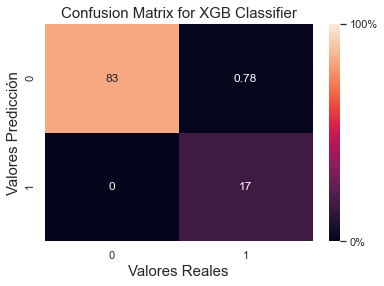

In [195]:
suma_total_conf_mat = confusion_matrix(y_test_modelo, y_pred_XGB_test_min_modelo).sum()
percentage = confusion_matrix(y_test_modelo, y_pred_XGB_test_min_modelo)/suma_total_conf_mat*100

print('Evaluación del XGB con un Test score de',XGB_min_balan.score(X_test_min_modelo,y_test_modelo),":")

ax = plt.axes()
sns.heatmap(percentage,
            annot=True, 
            cbar_kws={'format': '%.0f%%',
            'ticks': [0, 100]},
            vmax=100,
            vmin=0,
            ax = ax);

ax.set_title("Confusion Matrix for XGB Classifier",
             fontsize=15)
ax.set_xlabel("Valores Reales",
              fontsize=15)
ax.set_ylabel("Valores Predicción",
              fontsize=15);

<div class="alert alert-success" role="alert">
De la matriz de confusión se puede obtener que hay un valor casi nulo de Falsos Positivos y Falsos Negativos, con lo cual nuestro modelo XGB maneja excelentemente la clase.

### 8.7 - Análisis de Curva ROC - AUC

In [196]:
# Cálculo de probabilidades para los 4 modelos
probasRF = RF.predict_proba(X_modelo)
probastree = tree.predict_proba(X_modelo)
probasLR = LR.predict_proba(X_modelo)
probasKNN = KNN.predict_proba(X_modelo)
probasXGB = XGB.predict_proba(X_modelo)

# Cálculo de parámetros para nuestra curva ROC-AUC
FPr, VPr, thresholds = roc_curve(y_modelo, probasRF[:,1])
FPr1, VPr1, thresholds = roc_curve(y_modelo, probastree[:,1])
FPr2, VPr2, thresholds2 = roc_curve(y_modelo, probasLR[:,1])
FPr3, VPr3, thresholds3 = roc_curve(y_modelo, probasKNN[:,1])
FPr4, VPr4, thresholds3 = roc_curve(y_modelo, probasXGB[:,1])

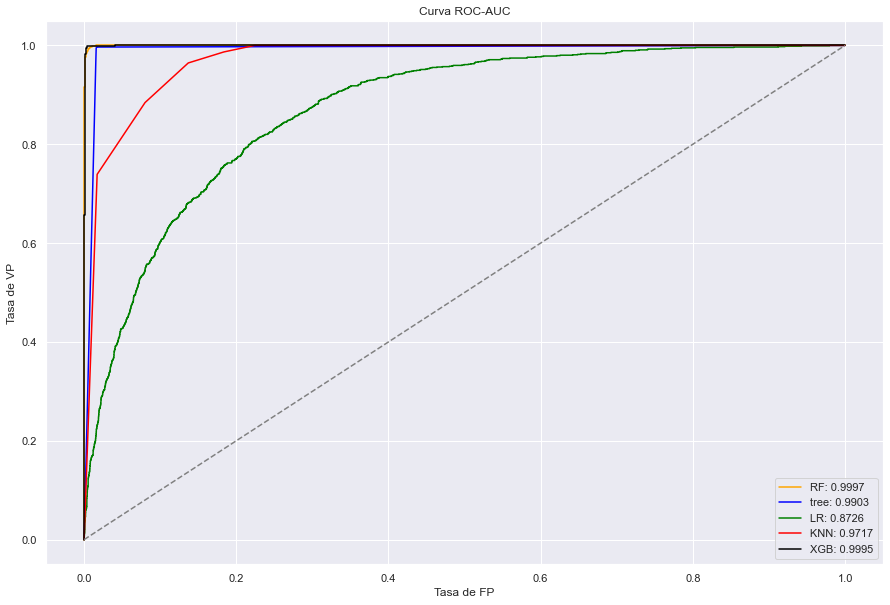

In [184]:
# Cálculo del área debajo de la curva, recibe también las etiquetas verdaderas y la proba de que valgan 1.
aucRF = roc_auc_score(y_modelo, probasRF[:,1])
aucTREE = roc_auc_score(y_modelo, probastree[:,1])
aucLR = roc_auc_score(y_modelo, probasLR[:,1])
aucKNN = roc_auc_score(y_modelo, probasKNN[:,1]);
aucXGB = roc_auc_score(y_modelo, probasXGB[:,1]);

#Graficamos la curva ROC-AUC

fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Curva ROC-AUC')

ax.plot(FPr,
        VPr,
        label='RF'': {}'.format(round(aucRF, 4)),
        color='orange')

ax.plot(FPr1,
        VPr1,
        label='tree'': {}'.format(round(aucTREE, 4)),
        color='blue')

ax.plot(FPr2,
        VPr2,
        label='LR'': {}'.format(round(aucLR, 4)),
        color='green')

ax.plot(FPr3,
        VPr3,
        label='KNN'': {}'.format(round(aucKNN, 4)),
        color='red')

ax.plot(FPr4,
        VPr4,
        label='XGB'': {}'.format(round(aucXGB, 4)),
        color='black')  

ax.plot([0, 1],
        [0, 1],
        linestyle='--',
        color='gray')

ax.set_xlabel('Tasa de FP')
ax.set_ylabel('Tasa de VP')

# Mostramos todas las etiquetas que colocamos
plt.legend();


![guarda.png](https://i.postimg.cc/JzTDB7Qk/guarda.png)

## 9 - Comparación XGB con DataSet balanceado por Under Sampling

El análisis anterior fue realizado con balanceo Over-Sampling. Se considera pertinente analizar qué hubiera pasado al aplicar Under-Sampling, ya que se eliminarían una gran cantidad de registros del dataset y se aliviaría el procesamiento de datos.

A continuación, se aplica Under Sampling y se compara con las métricas anteriormente calculadas para XGB:

In [185]:
df_modelo_2 = df_modelo.copy()

In [186]:
# Recuento de Target
target_count_0, target_count_1 = df_modelo_2['Target'].value_counts()

# Separacion de clases 
target_0 = df_modelo_2[df_modelo_2['Target'] == 0]
target_1 = df_modelo_2[df_modelo_2['Target'] == 1]

print('Target 0:', target_0.shape)
print('Target 1:', target_1.shape)

Target 0: (6430, 28)
Target 1: (1211, 28)


Se tomará el total de los registros para target = 1 (1211) y el doble (con respecto a target 1) para el target 0. Esto otorgará un balance en el target de dos tercios.

0    2422
1    1211
Name: Target, dtype: int64


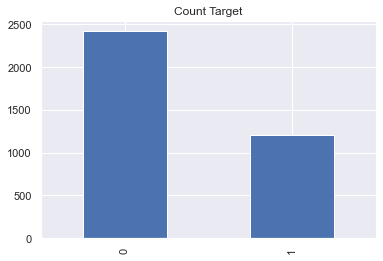

In [187]:
# Aplicamos Oversampling
target_0_under = target_0.sample(2422)

# Contamos las clases resultantes:
test_under = pd.concat([target_0_under, target_1], axis=0)

test_under['Target'].value_counts().plot(kind='bar', title='Count Target');

print(test_under['Target'].value_counts());

In [188]:
# Separamos los datos de entrada de la salida

X_us = test_under.drop('Target',
                       axis=1) # Elimino de mi dataset la variable target

y_us = test_under.Target # Defino el Target

In [189]:
#Me quedo con 20% para test y 80% para train

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us,
                                                                y_us,
                                                                test_size=0.20,
                                                                random_state=42) 

XGB.fit(X_train_us, y_train_us)

[23:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
# Predecimos para nuestro nuevo modelo con under sampling

y_pred_XGB_train_us = XGB.predict(X_train_us)
y_pred_XGB_test_us = XGB.predict(X_test_us)

In [191]:
print('Accuracy XGB Under Sampling:')

print('Train', accuracy_score(y_train_us,
                              y_pred_XGB_train_us))
print('Test', accuracy_score(y_test_us,
                              y_pred_XGB_test_us))

print("----------------------------------")

print('Accuracy XGB Over Sampling anterior:')

print('Train', accuracy_score(y_train_modelo,
                              y_pred_XGB_train_min_modelo))

print('Test', accuracy_score(y_test_modelo,
                             y_pred_XGB_test_min_modelo))

Accuracy XGB Under Sampling:
Train 1.0
Test 0.9546079779917469
----------------------------------
Accuracy XGB Over Sampling anterior:
Train 0.994016454749439
Test 0.9921500218054949


In [192]:
print("XGB Under Sampling:\n")
print(metrics.classification_report(y_test_us,
                                    y_pred_XGB_test_us))

print("----------------------------------")

print("XGB Over Sampling:\n")
print(metrics.classification_report(y_test_modelo,
                                    y_pred_XGB_test_min_modelo))

XGB Under Sampling:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.95      0.90      0.93       227

    accuracy                           0.95       727
   macro avg       0.95      0.94      0.95       727
weighted avg       0.95      0.95      0.95       727

----------------------------------
XGB Over Sampling:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1910
           1       0.96      1.00      0.98       383

    accuracy                           0.99      2293
   macro avg       0.98      1.00      0.99      2293
weighted avg       0.99      0.99      0.99      2293



In [193]:
# Comparación del RMSE

predicciones_us = y_pred_XGB_test_us
rmse_us = mean_squared_error(y_true=y_test_us,
                             y_pred=predicciones_us,
                             squared=False)

print(f"XGB Over Sampling = El error (rmse) de test es: {rmse_min}")
print(f"XGB Under Sampling = El error (rmse) de test es: {rmse_us}")

XGB Over Sampling = El error (rmse) de test es: 0.08860010267773404
XGB Under Sampling = El error (rmse) de test es: 0.2130540354188418


Evaluación del XGB Classifier con un score en test de un 0.9546079779917469 :


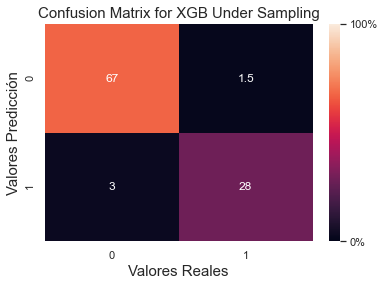

In [194]:
# Comparación de la Matriz de Confusión

suma_total_conf_mat_us = confusion_matrix(y_test_us, y_pred_XGB_test_us).sum()
percentage = confusion_matrix(y_test_us, y_pred_XGB_test_us)/suma_total_conf_mat_us*100

print('Evaluación del XGB Classifier con un score en test de un',XGB.score(X_test_us,y_test_us),":")

ax = plt.axes()
sns.heatmap(percentage,
            annot=True, 
            cbar_kws={'format': '%.0f%%',
            'ticks': [0, 100]},
            vmax=100,
            vmin=0,
            ax = ax);

ax.set_title("Confusion Matrix for XGB Under Sampling",
             fontsize=15)
ax.set_xlabel("Valores Reales",
              fontsize=15)
ax.set_ylabel("Valores Predicción",
              fontsize=15);

<div class="alert alert-success" role="alert">
    
Aplicando Under Sampling, la performance del modelo disminuye. Con lo cual se aconseja seguir utilizando Over Sampling para XGB.

## Conclusiones Finales!!! 

El desarrollo de este análisis fue principalmente para conocer las posibles causas u ofrecer soluciones al recurrente abandono de clientes en el banco.

Podemos recomendarle al gerente de la sucursal que se han seleccionado el siguiente grupo de variables, ordenadas descendentemente según el nivel de importancia, las cuales son las más significativas para el óptimo desarrollo del modelo XGB Classifier:

- **Total_Trans_Ct**
- Total_Revolving_Bal
- Total_Relationship_Count
- **Total_Trans_Amt**
- Months_Inactive_12
- **Age**

Dicho esto, la sucursal tendrá que plantear estrategias que le permita optimizar estas variables de acuerdo a cada grupo de clientes, con el fin de que la tasa de abandono disminuya en valores pretendidos.

Teniendo esto en cuenta las variables resaltadas en **negrita**, se optan por las siguientes soluciones:

- Respecto a Total_Trans_Amt: Del punto 5.3 se concluye que hay que hacer especial foco en los clientes con tarjeta azul e ingresos menores a 40K, siendo los que mayor proporción de clientes tiene la sucursal y mayormente abandonan el servicio. Se deduce en este mismo punto que, dentro de los que no abandonaron, un 7,8 % de esos clientes con tarjeta azul realizaron montos de transacciones superiores al resto de su mismo grupo. Por lo tanto, se aconseja al dueño de la sucursal ofrecer tarjetas de mayor categorización (Silver, Gold o Platinium) a este grupo de individuos, ya que tienen la capacidad económica de afrontar mayores gastos. Esto otorgaría mejores beneficios y podría prevenir de que abanonen el servicio.

- Respecto a Total_Trans_Amt: Otra acción relacionada con el punto anterior sería un motor de recomendación para adquisición de productos mayormente orientados a clientes que disponen de las tarjeta Blue, siendo los que mayormente abandonan el servicio.

- Respecto a Age: Según el punto 3.2, convendría segmentar los clientes en 3 grupos etarios: los menores de 30, entre 30 y 40 y mayores de 40. Posteriormente, realizar estrategias de marketing, las cuales deberían incluir un marketing **agresivo** hacia las personas menores a 30 años (jóvenes) y el grupo de personas mayores a 40 años. Recordemos que la mayor cantidad de clientes rondan entre los 30 y 40 años. Esto será para atraer poblaciones de otras edades y así aumentar clientela y reducir abandonos.

- Respecto a Total_Trans_CT y Total_Trans_Amt: También se vio que los clientes que abandonan el servicio realizan montos de transacciones más pequeños y en menores cantidades a comparación de los que abandonan (Punto 5.3). Para ello, se aconseja realizar campañas de marketing sobre los individuos que están realizando pocas transacciones o transacciones de bajos montos, enviándoles promociones, alianzas con locales de gastronomía, vestimenta, ectcétera, de manera que incitar el uso de la tarjeta.